# Imports

In [1]:
import sys
import os
import shutil

from bumps.names import *
from bumps.dream.state import load_state
import matplotlib.pyplot as plt

from molgroups.support import molstat
from molgroups.infotheory import entropy

print(os.getcwd())

# always use the same testdata
shutil.copyfile('./bu/sim0.dat', os.getcwd()+'/sim0.dat')
shutil.copyfile('./bu/sim1.dat', os.getcwd()+'/sim1.dat')
shutil.copyfile('./bu/sim2.dat', os.getcwd()+'/sim2.dat')

C:\Users\Frank Heinrich\PycharmProjects\molgroups\examples\information_theory\entropy_gridsearch_sequential_execution\SANS\SphereSilica_Two_Datasets


'C:\\Users\\Frank Heinrich\\PycharmProjects\\molgroups\\examples\\information_theory\\entropy_gridsearch_sequential_execution\\SANS\\SphereSilica_Two_Datasets/sim2.dat'

# Create Short Example Fit

- The model needs to define fittable parameters with unique names, as shown below. For example, model0.scale and model1.scale would not be unique, since both parameters would be internally named 'scale' by bumps. In such a case, define parameters using the Parameter method and assign them to the models afterwards.

In [2]:
%%writefile sanssilica.py
import numpy

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

# IMPORT THE DATA USED
data0 = load_data('sim0.dat')
data1 = load_data('sim1.dat')
data2 = load_data('sim2.dat')

#setattr(data, 'qmin', 0.01)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
kernel = load_model('sphere')

pars0 = dict(scale=0.002, background=0.15, sld=3.0, sld_solvent=2.4, radius=60.0)
pars1 = dict(scale=0.002, background=0.15, sld=3.0, sld_solvent=3.4, radius=60.0)
pars2 = dict(scale=0.002, background=0.15, sld=3.0, sld_solvent=4.4, radius=60.0)

model0 = Model(kernel, **pars0)
model1 = Model(kernel, **pars1)
model2 = Model(kernel, **pars2)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)

background0 = Parameter(name='background0', value=0.4).range(0.01, 0.8)
background1 = Parameter(name='background1', value=0.4).range(0.01, 0.8)
background2 = Parameter(name='background2', value=0.4).range(0.01, 0.8)
sld_solvent0 = Parameter(name='sld_solvent0', value=2.0).range(-0.56, 6.4)
sld_solvent1 = Parameter(name='sld_solvent1', value=2.0).range(-0.56, 6.4)
sld_solvent2 = Parameter(name='sld_solvent2', value=2.0).range(-0.56, 6.4)

model0.scale.range(0.0001, 0.05)
model0.background = background0
model0.sld.range(1, 4)
model0.sld_solvent = sld_solvent0
model0.radius.range(50., 200.)

model1.scale = model0.scale
model1.background = background1
model1.sld = model0.sld
model1.sld_solvent = sld_solvent1
model1.radius = model0.radius

model2.scale = model0.scale
model2.background = background2
model2.sld = model0.sld
model2.sld_solvent = sld_solvent2
model2.radius = model0.radius


M0 = Experiment(data=data0, model=model0)
M1 = Experiment(data=data1, model=model1)
M2 = Experiment(data=data2, model=model2)

problem = MultiFitProblem([M0, M1, M2])

Overwriting sanssilica.py


# Variables

In [3]:
#Example is from https://github.com/SasView/sasmodels/tree/master/example

store = "T"
setupdir = os.getcwd()
runfile = "sanssilica"
fitsource = "SASView"

# remove store directory if it already exists, since we do not want to reload here
if os.path.isdir(os.path.join(setupdir, store)):
    shutil.rmtree(os.path.join(setupdir, store))

burn=100
steps=100


# Setup Example Fit

In [4]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

No file: C:\Users\Frank Heinrich\PycharmProjects\molgroups\examples\information_theory\entropy_gridsearch_sequential_execution\SANS\SphereSilica_Two_Datasets\T\sanssilica.py
No state to reload.


# steps: 100, # draws: 9000
step 1 cost 18450.208(13)
                             background0 ...|......   0.318204 in (0.01,0.8)
                                  radius ........|.    179.749 in (50,200)
                                   scale |......... 0.00157917 in (0.0001,0.05)
                                     sld |.........    1.05883 in (1,4)
                            sld_solvent0 ....|.....    2.61354 in (-0.56,6.4)
                             background1 ....|.....   0.349968 in (0.01,0.8)
                            sld_solvent1 .....|....     3.1192 in (-0.56,6.4)
                             background2 .........|   0.745528 in (0.01,0.8)
                            sld_solvent2 ...|......    1.78838 in (-0.56,6.4)
step 17 cost 466.672(13)
step 33 cost 373.280(13)
step 49 cost 366.151(13)
step 65 cost 169.554(13)
step 81 cost 132.363(13)
step 97 cost 107.750(13)
step 113 cost 107.750(13)
step 129 cost 72.797(13)
step 145 cost 23.805(13)
step 161 cost 23.805(13)
ste

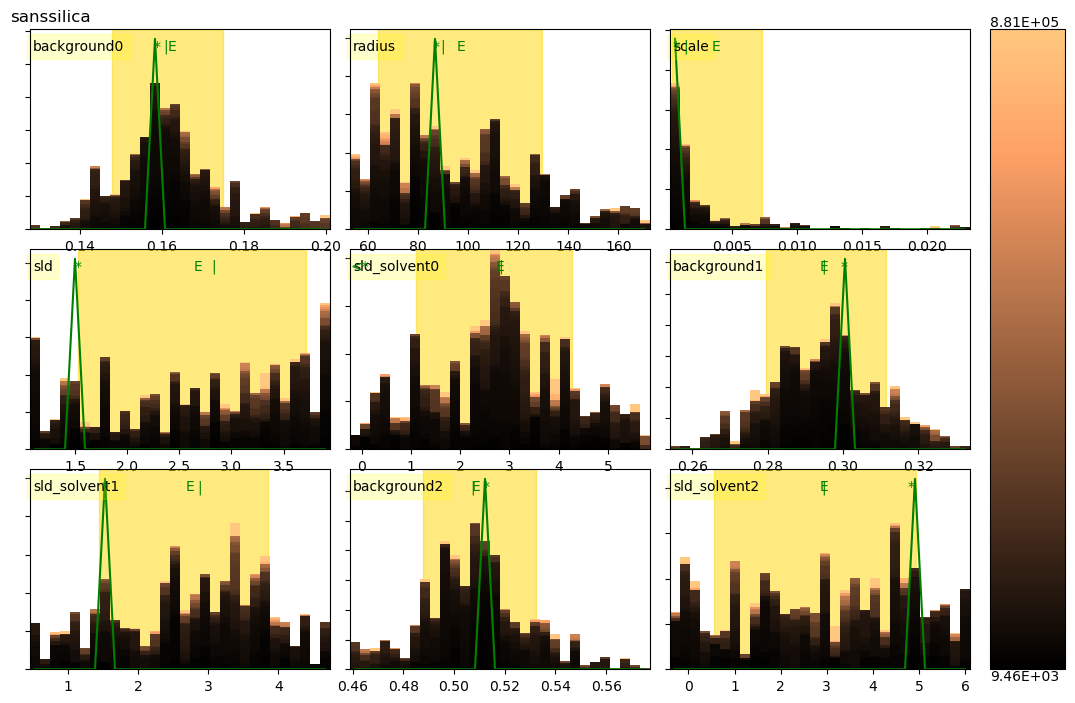

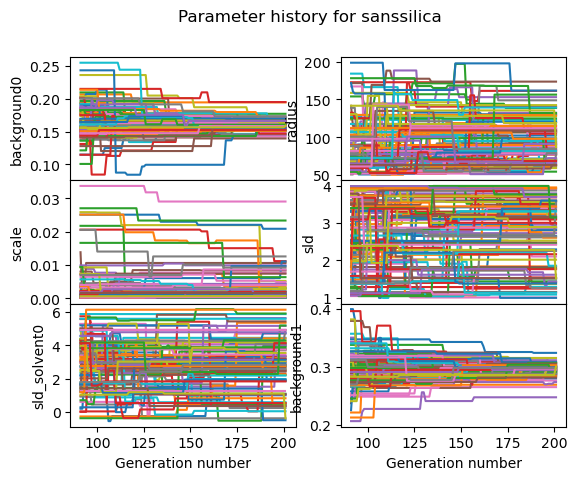

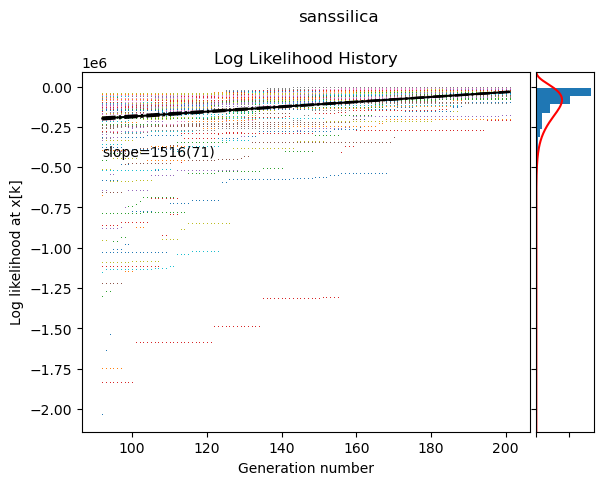

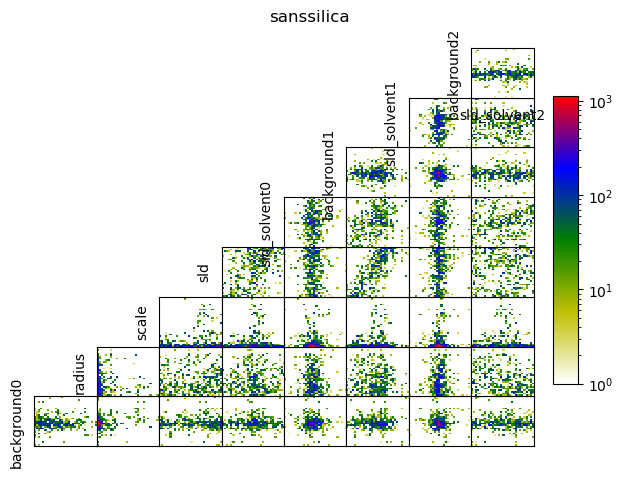

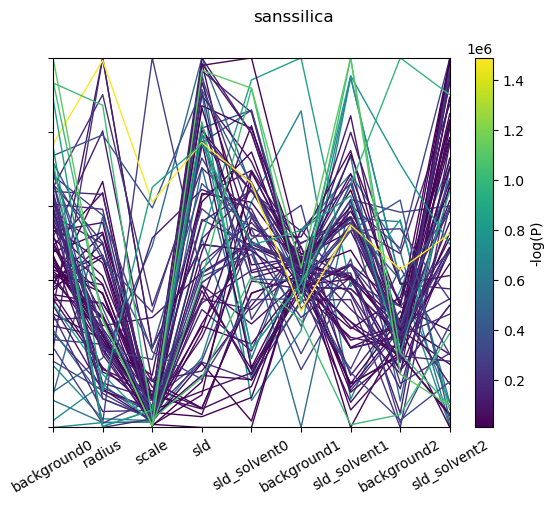

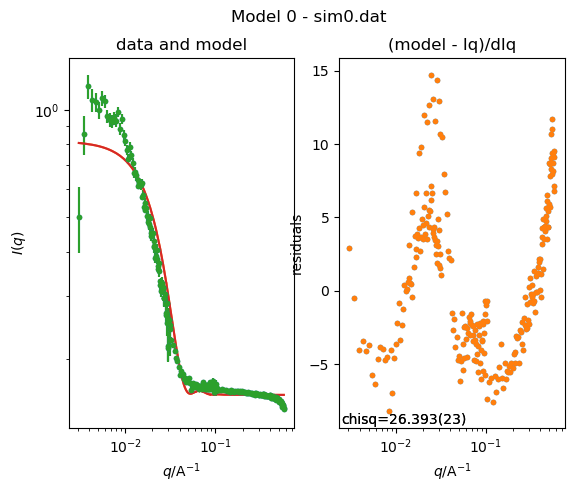

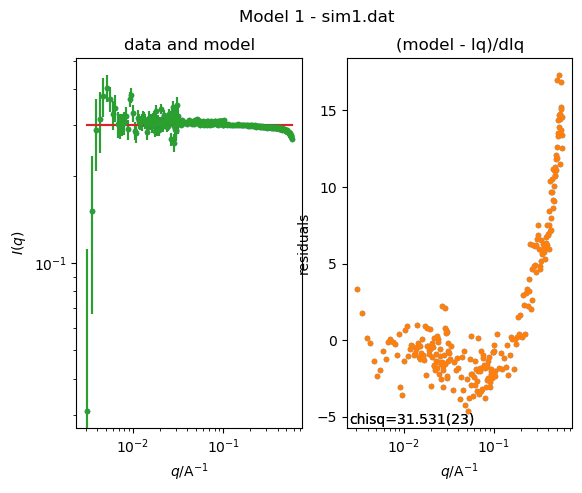

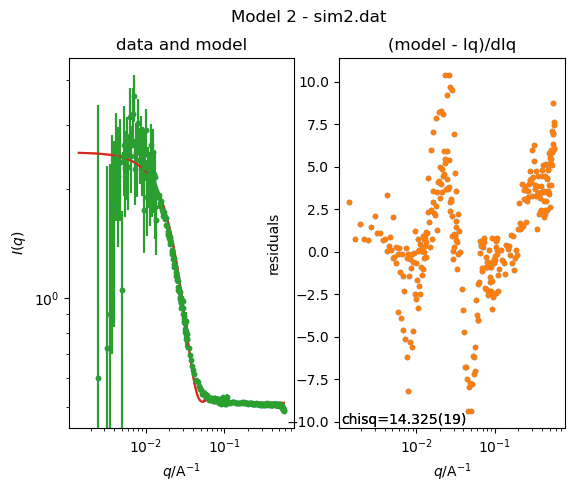

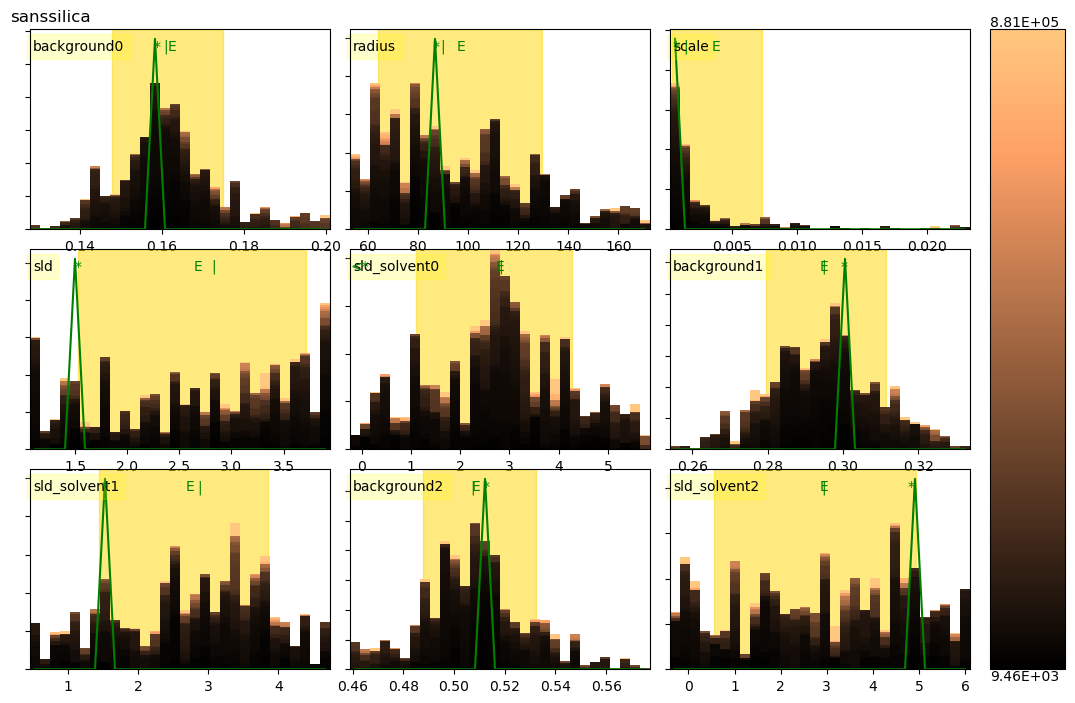

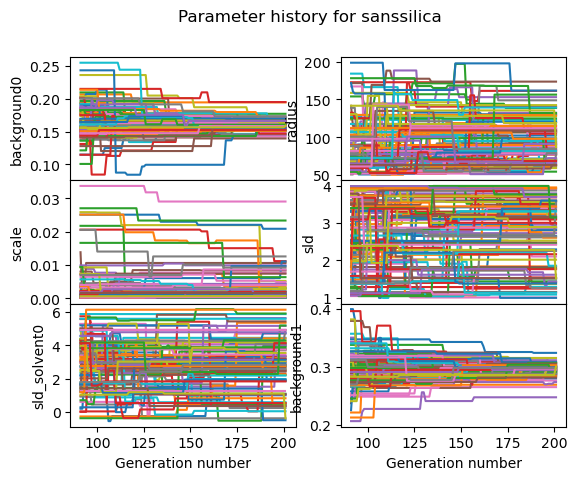

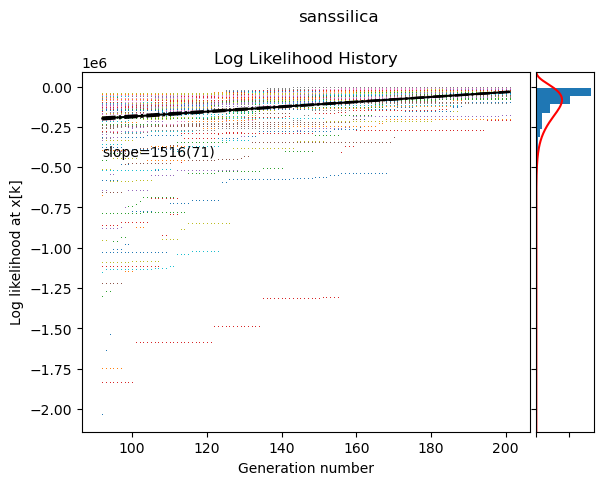

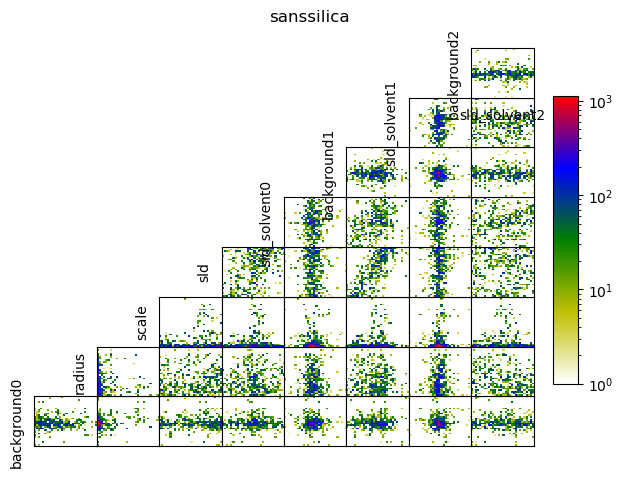

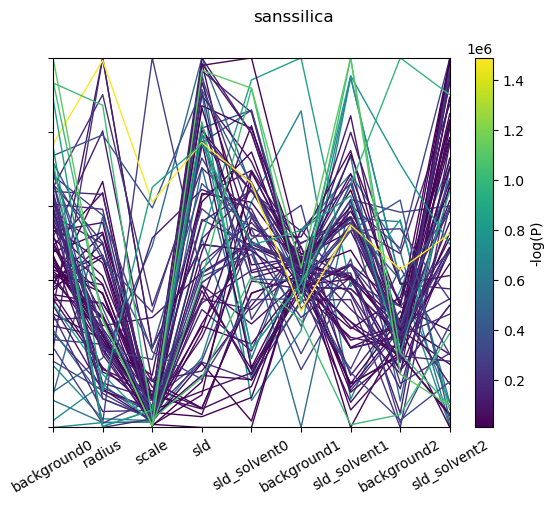

In [5]:
fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

In [6]:
%%writefile simpar.dat
background0 0.158961
background1 0.295525
background2 0.509283
sld_solvent0 1.884
sld_solvent1 3.362
sld_solvent2 0.875
scale 0.0013
sld  3.098
radius  90.563

Overwriting simpar.dat


In [7]:
sb = 0.0
configuration_dataset1 = [{'lambda': 6.21,
                            "sample_detector_distance": 100,
                            'source_sample_distance': 387.6,
                            'source_aperture_radius':5.08*0.5,
                            'sample_aperture_radius':1.27*0.5,
                            "beamstop_diameter": 10.16,
                            "neutron_flux": 9e5,
                            'time': 1600,
                            'beam_center_x': 25,
                            "dlambda_lambda":0.136,
                            "differential_cross_section_buffer": sb},
                          {'lambda': 6.21,
                           "sample_detector_distance": 400,
                           'source_sample_distance': 850.05,
                           'source_aperture_radius':5.08*0.5,
                           'sample_aperture_radius':1.27*0.5,
                           "beamstop_diameter": 10.16,
                           "neutron_flux": 2e5,
                           'time': 3600,
                           "dlambda_lambda":0.136,
                           "differential_cross_section_buffer": sb},
                         {'lambda': 6.21,
                          "sample_detector_distance": 1300,
                          'source_sample_distance': 1467,
                          'source_aperture_radius':5.08*0.5,
                          'sample_aperture_radius':1.27*0.5,
                          "dlambda_lambda":0.136,
                          "beamstop_diameter": 10.16,
                          "neutron_flux": 1e5,
                          'time': 4400,
                          "differential_cross_section_buffer": sb}]

configuration = [configuration_dataset1, configuration_dataset1, configuration_dataset1]

fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration)

C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = liData[i][1].append(newframe, ignore_index=True)
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = newframe.append(liData[i][1], ignore_index=True)


background0 0.158961
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 1.884
background1 0.295525
sld_solvent1 3.362
background2 0.509283
sld_solvent2 0.875
background0 0.158961
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 1.884
background1 0.295525
sld_solvent1 3.362
background2 0.509283
sld_solvent2 0.875


Compare original and simulated data.

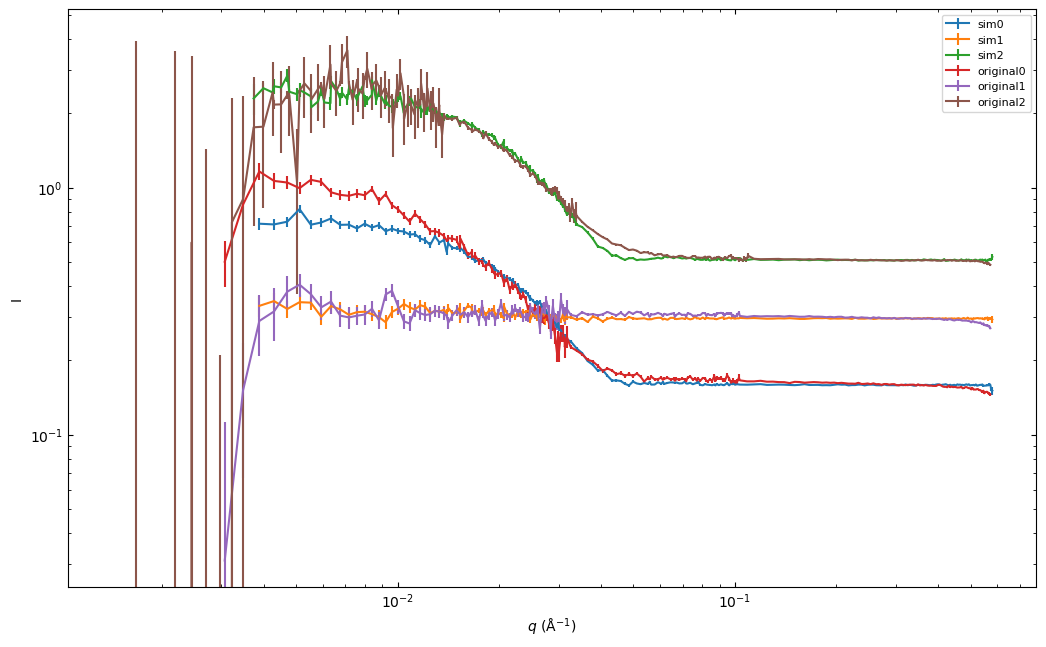

In [8]:
import pandas

fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original0 = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata0 = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
original1 = pandas.read_csv('bu/sim1.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata1 = pandas.read_csv('sim1.dat', sep=' ', skip_blank_lines=True,comment='#')
original2 = pandas.read_csv('bu/sim2.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata2 = pandas.read_csv('sim2.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.errorbar(simdata0['Q'], simdata0['I'], simdata0['dI'], label="sim0")
ax.errorbar(simdata1['Q'], simdata1['I'], simdata1['dI'], label="sim1")
ax.errorbar(simdata2['Q'], simdata2['I'], simdata2['dI'], label="sim2")
ax.errorbar(original0['Q'], original0['I'], original0['dI'], label="original0")
ax.errorbar(original1['Q'], original1['I'], original1['dI'], label="original1")
ax.errorbar(original2['Q'], original2['I'], original2['dI'], label="original2")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(1e-2, .1)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


Compare the simulated uncertainties. The ratio of the simulated over the original relative uncertainties is calculated.

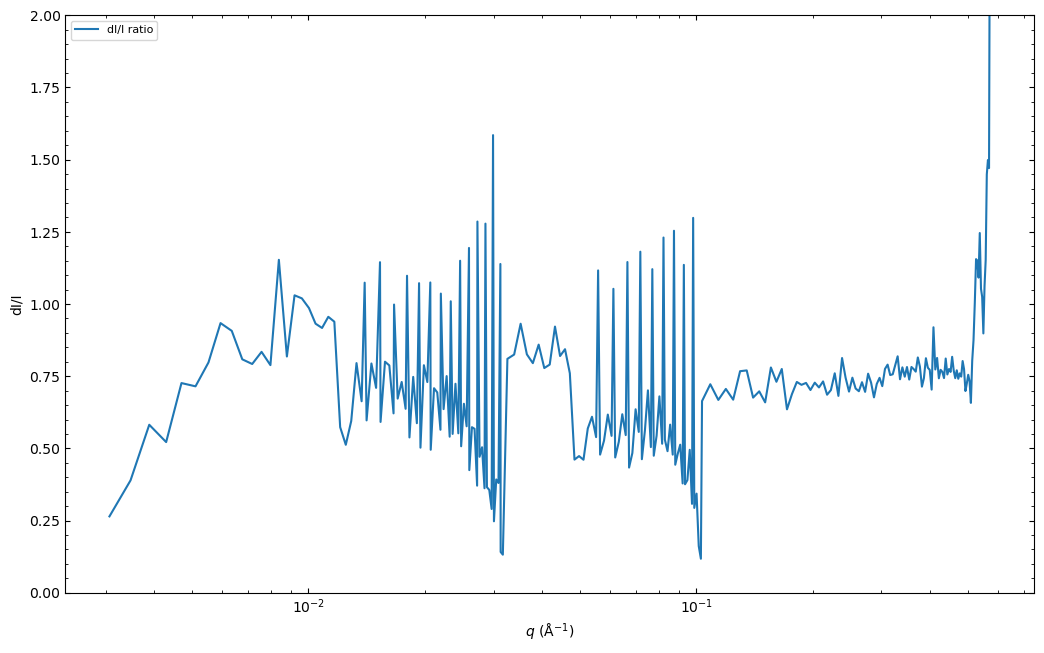

In [9]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdI = numpy.array(simdata['dI'].iloc[istart:iend])
simI =  numpy.array(simdata['I'].iloc[istart:iend])
length = iend - istart
originaldI = numpy.array(original['dI'].iloc[:length])
originalI = numpy.array(original['I'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdI/simI)/(originaldI/originalI), label="dI/I ratio")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dI/I", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


Compare the simulated and original relative Q-resolution dQ/Q as a ratio of simulated over original.

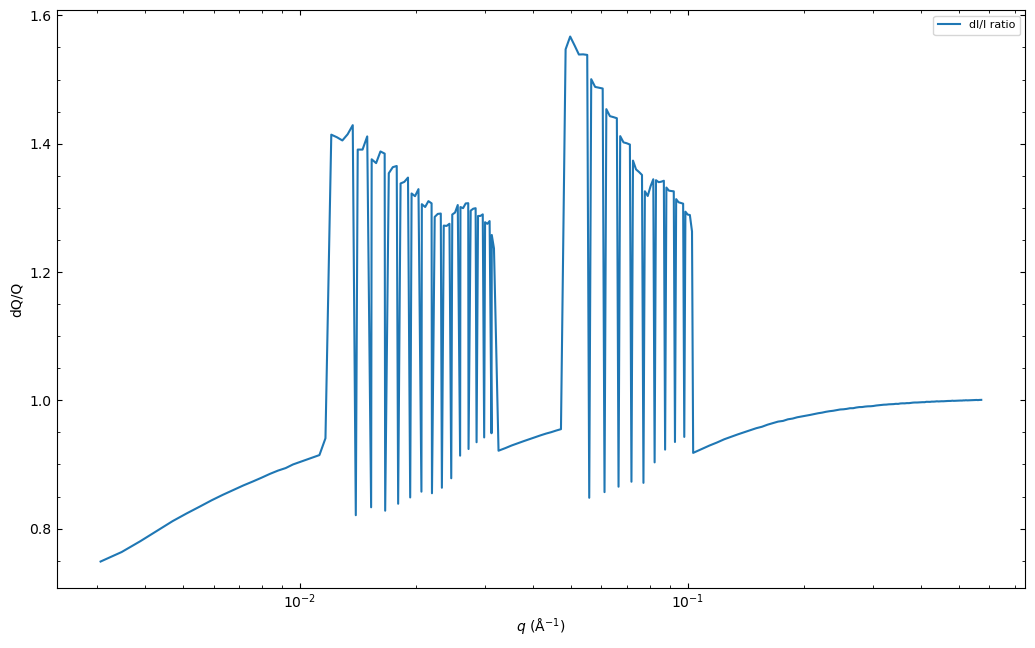

In [10]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdQ = numpy.array(simdata['dQ'].iloc[istart:iend])
simQ =  numpy.array(simdata['Q'].iloc[istart:iend])
length = iend - istart
originaldQ = numpy.array(original['dQ'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdQ/simQ)/(originaldQ/originalQ), label="dI/I ratio")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dQ/Q", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


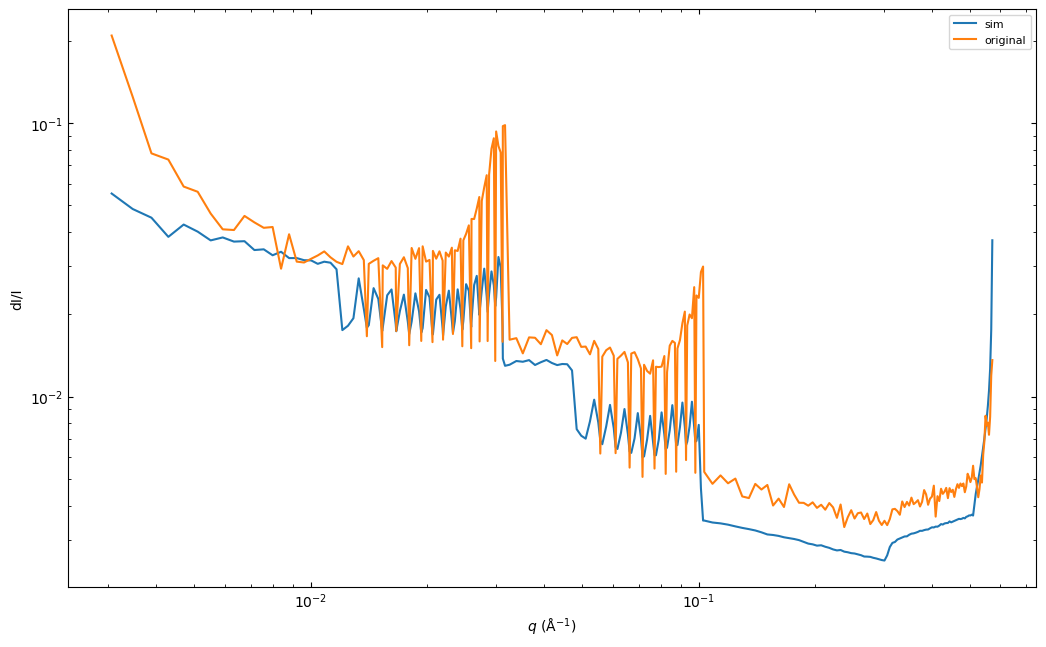

In [11]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdI = numpy.array(simdata['dI'].iloc[istart:iend])
simI =  numpy.array(simdata['I'].iloc[istart:iend])
length = iend - istart
originaldI = numpy.array(original['dI'].iloc[:length])
originalI = numpy.array(original['I'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdI/simI), label="sim")
ax.plot(originalQ, (originaldI/originalI), label="original")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dI/I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


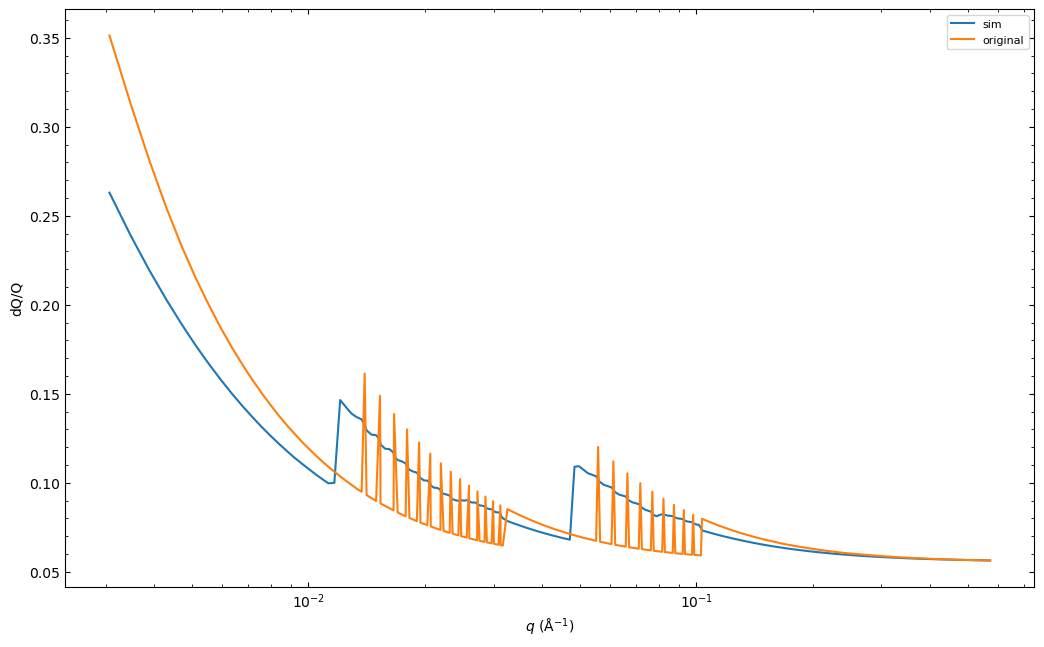

In [12]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdQ = numpy.array(simdata['dQ'].iloc[istart:iend])
simQ =  numpy.array(simdata['Q'].iloc[istart:iend])
length = iend - istart
originaldQ = numpy.array(original['dQ'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdQ/simQ), label="sim")
ax.plot(originalQ, (originaldQ/originalQ), label="original")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dQ/Q", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


# Experimental Optimization

* Entropypar.dat contains a list of all fit parameters with a designation, whether they are marginal (d) or nuisance (i) parameters. This is followed by the parameter name, the initial parameter value, and the fit boundaries.
* Configuration parameters are given by a preceeding n x y, where x is the data set it applies to and y the configuration number. Specifying x,y = '*' makes this parameter apply to all configurations.
* Any numbers x y following a fit parameter indicates that this paramter is used for this particular dataset/configuration to determine the background (incoherent crosssection). This typically applies to SLDs. The 'mode' argument for entropy.Entropy() then determines whether this is to be interpreted as an aqueous solvent or other. Sometimes, instead of subtracting an incoherent crosssection from the data, a background parameter is retained in the model. If any of the parameters is asigned an x = bi, this background will be se to the incoherent (isotropic) crosssection of the ith data set, instead of applying this value to the configuration. Fit boundaries for such backgrounds must be large enough to encompass all possible outcomes. They will not be updated dynamically.
* If three more numbers are given, this designates that an information content search over this parameter is performed (start, stop, step).
* A preceding f (fi or fd) at the beginning of the line indicates that the fit boundaries for such a search parameter are fixed (for example for volume fractions between 0 and 1), otherwise the fit boundary moves according to the varied parameter and the initally given fit boundaries.
* Any theta offset currently needs to have an initial value of zero. Otherwise, refl1d will shift the q-values during data simulation with unexpected outcomes.
* If an instrumental parameter is specified for one data set, the instrumental parameter needs to be specified for all other datasets, as well.
* Data filenames are currently limited to sim.dat for a single file fit, or simx.dat, x = 0 ... n, for fits with multiple data sets

In [13]:
text = [
        'i b0 * background0 0.509283 0.0 2.0',
        'i b1 * background1 0.295525 0.0 2.0',
        'i b2 * background2 0.158961 0.0 2.0',
        'i 0 * sld_solvent0 2.0 1.98 2.02 -0.5 4.5 1.0 ',
        'i 1 * sld_solvent1 2.0 1.98 2.02 -0.5 4.5 1.0',
        'i 2 * sld_solvent2 4.5 4.48 4.52',
        'i _ _ scale 0.0013 0.0001 0.005',
        'd _ _ sld  3.098 1.0 4.0',
        'i _ _ radius  90.563 50 200',
        'n * * lambda 6.21',
        'n * * differential_cross_section_buffer 0.059',
        'n * 0 sample_detector_distance 100',
        'n * 1 sample_detector_distance 400',
        'n * 2 sample_detector_distance 1300',
        'n * 0 source_sample_distance 387.6',
        'n * 1 source_sample_distance 850.05',
        'n * 2 source_sample_distance 1467',
        'n * 0 neutron_flux 9e5',
        'n * 1 neutron_flux 2e5',
        'n * 2 neutron_flux 1e5',
        'n * * source_aperture_radius 2.54',
        'n * * sample_aperture_radius 0.635',
        'n * * dlambda_lambda 0.136',
        'n * * beamstop_diameter 10.16',
        'n * 0 time 1600',
        'n * 1 time 3600',
        'n * 2 time 4400',
        'n * 0 beam_center_x 26.416',
        'n * * cuvette_thickness 0.2'
        ]

f=open('entropypar.dat', 'w')
f.writelines(line + '\n' for line in text)
f.close()

In [14]:
# general fit setup
setupdir = setupdir
runfile = runfile
store = 'T'
fitsource = fitsource

# isotropic scattering background
# user-defined linear relationship between a SLD of the bulk solvent and the differential macroscopic scattering crosssection of the buffer
cross_section_background = {'slope':-0.1626, 'y_intercept': 0.7980}
mode = 'SANS_linear'

# particular entropy setup
burn = 5000
steps = 500
convergence = 2.0
miniter = 3
bClusterMode = False
bFetchMode = False
time = 2
bcalcsymmetric = True
upper_info_plotlevel = None
plotlimits_filename = ""
calcsingle = False

# setup batchscript for SLURM (if used)
script = ['#!/bin/bash\n',
          '#SBATCH --job-name=entro {mcmc_iteration}\n',
          '#SBATCH -A mc4s9np\n', '#SBATCH -p RM\n',
          '#SBATCH -t 0' + str(time) + ':00:00\n',
          '#SBATCH -N 4\n', '#SBATCH --ntasks-per-node 28\n',
          '\n',
          'set +x\n',
          'cd $SLURM_SUBMIT_DIR\n',
          '\n',
          'module load python/2.7.11_gcc\n',
          'export PYTHONPATH=/home/hoogerhe/bin/lib/python2.7/site-packages:/home/hoogerhe/src/bumps\n',
          '\n',
          'mpirun -np 112 python /home/hoogerhe/src/refl1d/bin/refl1d_cli.py {mcmc_dirname}/run.py --fit=dream --mpi --init=lhs --batch --pop=28 --time='
          + str(float(time) - 0.1) + ' --thin=20 --store={mcmc_dirname}/save --burn=' + str(burn)
          + ' --steps=' + str(steps) + '\n'
          ]
# script.append('cd '+dirname+'\n')


In [15]:
entr = entropy.Entropy(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    mcmcburn=burn,
    mcmcsteps=steps,
    convergence=convergence,
    miniter=miniter,
    mode=mode,
    background_rule = cross_section_background,
    bClusterMode=bClusterMode,
    bFetchMode=bFetchMode,
    calc_symmetric=bcalcsymmetric,
    upper_info_plotlevel=upper_info_plotlevel,
    plotlimits_filename=plotlimits_filename,
    slurmscript=script,
    configuration = configuration
)

The optimization might be supplemented with qmin, qmax, and qrangefromfile attributes that are applied to all datasets. These are independent of qrange limitations imparted by individual SANS configurations. When the q-range is taken from file, the first dataset (0) will be used. In most cases, provide the default values given below.

In [ ]:
qmin = None
qmax = None
qrangefromfile = False
entr.run_optimization(qmin=qmin, qmax=qmax, qrangefromfile=qrangefromfile)

No problem to reload.


C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = liData[i][1].append(newframe, ignore_index=True)
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = newframe.append(liData[i][1], ignore_index=True)


background0 0.4728
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 -0.5
background1 0.4728
sld_solvent1 -0.5
background2 0.0663
sld_solvent2 4.5
background0 0.4728
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 -0.5
background1 0.4728
sld_solvent1 -0.5
background2 0.0663
sld_solvent2 4.5
# steps: 500, # draws: 45000
-- Model 0 sim0.dat
.background = background0 = 0.473568 in [0.01,0.8]
.radius = 90.7085 in [50,200]
.radius_pd = 0
.radius_pd_n = 35
.radius_pd_nsigma = 3
.scale = 0.00130424 in [0.0001,0.05]
.sld = 3.08932 in [1,4]
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = sld_solvent0 = -0.516021 in [-0.52,-0.48]
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.up_angle = 0
.up_frac_f = 0
.up_frac_i = 0
.up_phi = 0

[chisq=0.932(23), nllf=117.95]
-- Model 1 sim1.dat
.background = background1 = 0.472872 in [0.01,0.8]
.radius = 90.7085 in [50,200]
.radius_pd = 0
.radius_pd_n = 35
.radius_pd_nsigma = 3
.scale = 0.00130424 in [0.0001,0.05]
.sld = 3.08932

C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = liData[i][1].append(newframe, ignore_index=True)
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = newframe.append(liData[i][1], ignore_index=True)


background0 0.4728
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 -0.5
background1 0.4728
sld_solvent1 0.5
background2 0.0663
sld_solvent2 4.5
background0 0.4728
radius 90.563
scale 0.0013
sld 3.098
sld_solvent0 -0.5
background1 0.4728
sld_solvent1 0.5
background2 0.0663
sld_solvent2 4.5
# steps: 500, # draws: 45000


In [ ]:
entr.plot_results()